### Practice Exercise (Polynomial Regression)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys

current_dir = Path.cwd()
project_root = current_dir.parent.absolute()

sys.path.insert(0,str(project_root))

from config import DATASETS_DIR, POSITION_SALARIES

In [4]:
#loading the dataset
df = pd.read_csv(POSITION_SALARIES)

X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values


In [6]:
#Training the linear regression model
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X,y)

LinearRegression()

In [7]:
#training the polynomial regression model
from sklearn.preprocessing import PolynomialFeatures


degree=4
poly_feature = PolynomialFeatures(degree=degree)
X_poly = poly_feature.fit_transform(X)

poly = LinearRegression()
poly.fit(X_poly,y)



LinearRegression()

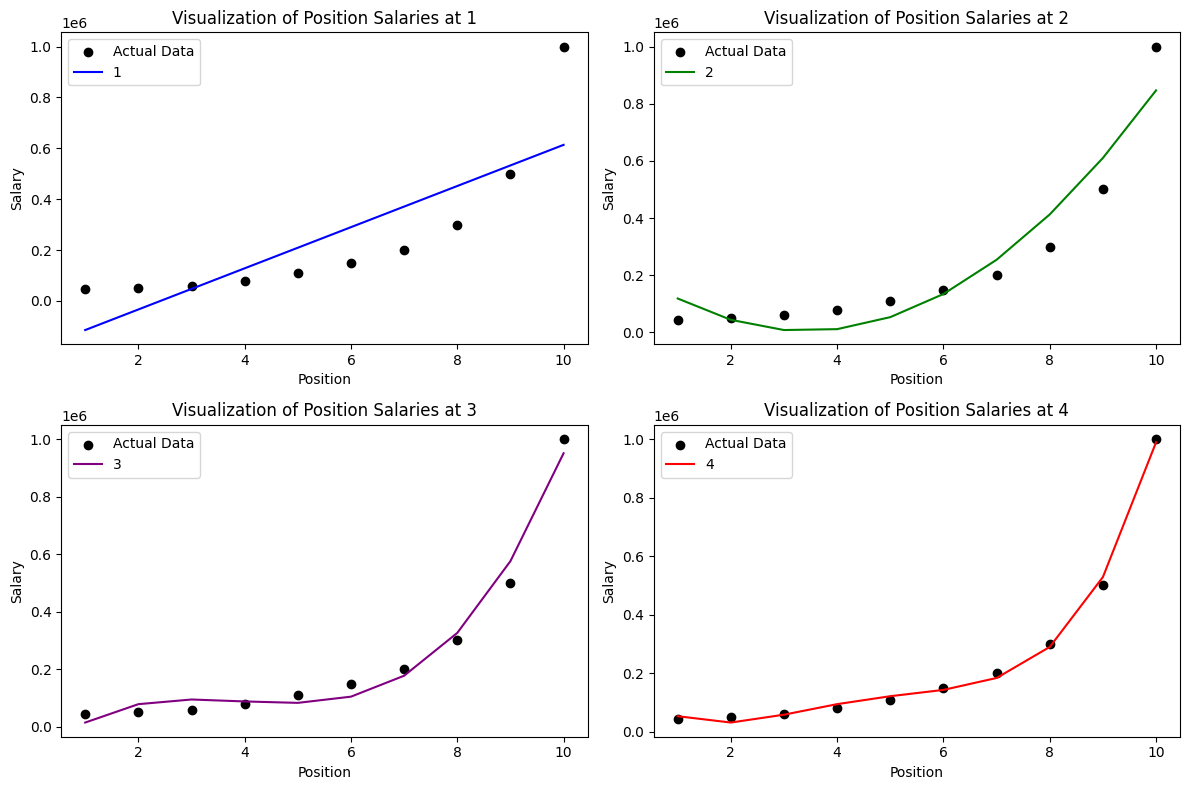

In [12]:
#Visualization of models with different degrees

plt.figure(figsize=(12,8))
degrees=[1,2,3,4]
color=['blue','green','purple','red']

for i, degree in enumerate(degrees):
    plt.subplot(2,2, i+1)

    #fit new model(only_poly)
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    poly = LinearRegression()
    poly.fit(X_poly,y)

    y_pred_poly = poly.predict(X_poly)

    plt.scatter(X,y,color='black',label='Actual Data')
    plt.plot(X,y_pred_poly,color=color[i],label=f'{degree}')
    plt.title(f'Visualization of Position Salaries at {degree}')
    plt.ylabel("Salary")
    plt.xlabel("Position")
    plt.legend()

plt.tight_layout()
plt.show()

In [18]:
#Model Evalation metrics
from sklearn.metrics import r2_score

#linear regression
y_pred_linear_r = ln.predict(X)
#poly
y_pred_poly_r = poly.predict(X_poly)

R2_linear = r2_score(y,y_pred_linear_r)
R2_poly = r2_score(y,y_pred_poly_r)

print(f'R2 score for linear regression trained model: {R2_linear:.4f}')
print(f'R2 score for polynomial regression trained model is at degree {degree} : {R2_poly:.4f}')

R2 score for linear regression trained model: 0.6690
R2 score for polynomial regression trained model is at degree 4 : 0.9974


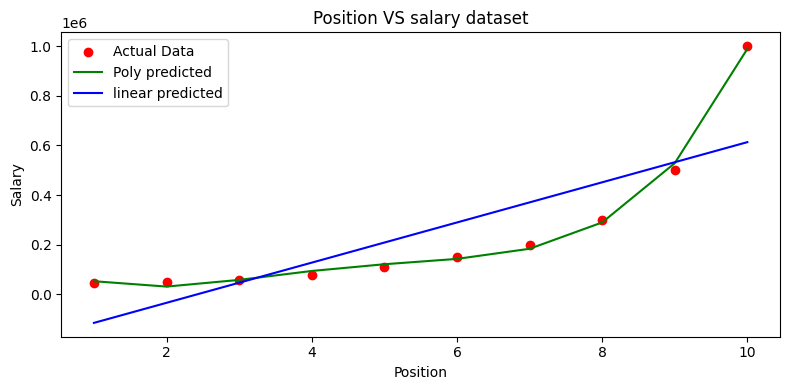

In [21]:
#comparing the linear and polynomial

plt.figure(figsize=(8,4))
#plt.subplot(1,2,1)
plt.scatter(X,y,color='r',label='Actual Data')
plt.plot(X,poly.predict(X_poly),color='green',label='Poly predicted')
plt.plot(X,ln.predict(X),color='blue',label='linear predicted')
plt.title("Position VS salary dataset")
plt.ylabel("Salary")
plt.xlabel("Position")
plt.legend()
plt.tight_layout()
plt.show()